<h1 style="text-align:center; font-size:40px;"> Team 6 - TASK - 7 & 8 </h1>

## Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

## Importing the files (features and target) from https://archive.ics.uci.edu/dataset/2/adult

In [21]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df_adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = df_adult.data.features 
Y = df_adult.data.targets 


In [23]:
# Merging features and target table(X and Y)

df_adult = X.copy()
df_adult["income"] = Y.iloc[:, 0] 

In [25]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [27]:
df_adult["income_binary"] = (df_adult["income"] == ">50K").astype(int)
df_adult["income_binary"].value_counts()

income_binary
0    41001
1     7841
Name: count, dtype: int64

In [29]:
# Removing the trailing dot for income column
df_adult["income"] = df_adult["income"].str.strip().str.replace(".", "", regex=False)
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [30]:
#Other way to create income_binary column

# Creating binary income column
df_adult["income_binary"] = df_adult["income"].apply(lambda x: 1 if x == ">50K" else 0)


# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS
# ═══════════════════════════════════════════════════════════════

Bivariate analysis in machine learning examines the relationship between two variables (typically one feature and one target) to identify correlations, patterns, and dependencies, playing a crucial role in feature selection and exploratory data analysis (EDA). It involves comparing numerical-numerical, categorical-categorical, or mixed data types using methods like scatterplots, correlation matrices, and statistical tests (e.g., ANOVA, chi-square) to improve predictive model accuracy.

# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS — Numerical vs Numerical
# ═══════════════════════════════════════════════════════════════

   
# Age vs Education Number

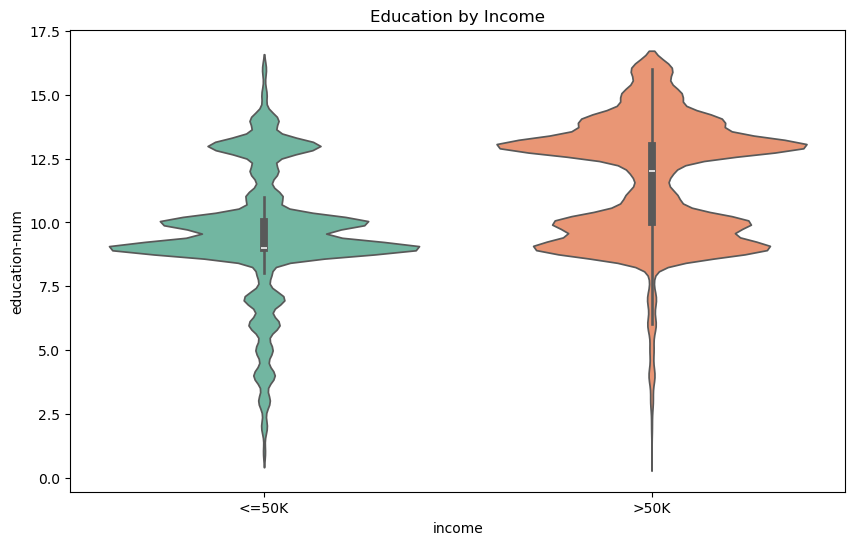

In [139]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_adult, x="income", y="education-num", 
               hue="income", legend=False, palette="Set2")
plt.title("Education by Income")
plt.show()

This scatter plot shows the relationship between age and education level. Each point represents an individual. The plot helps identify patterns, trends, or correlations between the two numerical variables.

# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS — ALL NUMERICAL vs INCOME(target variable)
# ═══════════════════════════════════════════════════════════════

## Age vs Income

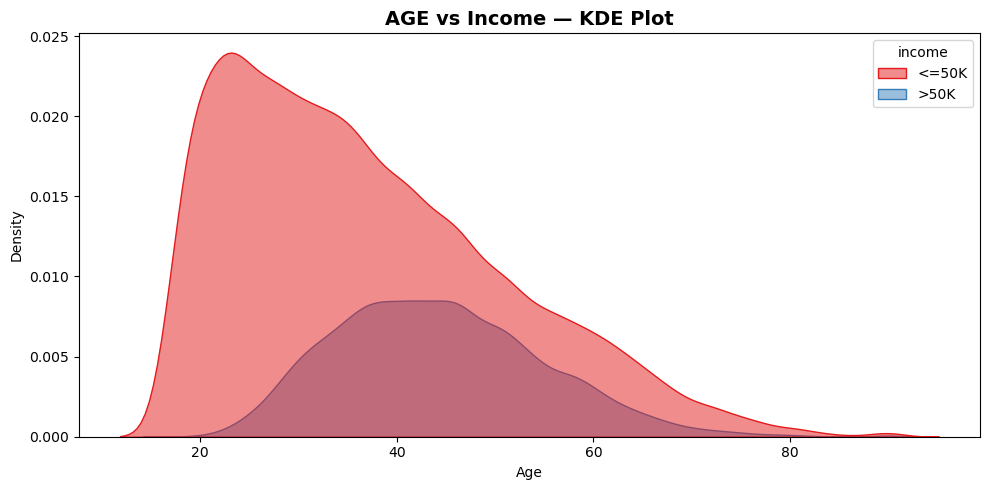

In [163]:
# KDE Plot — Age distribution by income

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("AGE vs Income — KDE Plot", fontsize=14, fontweight="bold")
sns.kdeplot(data=df_adult, x="age", hue="income", fill=True, palette="Set1", alpha=0.5, ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

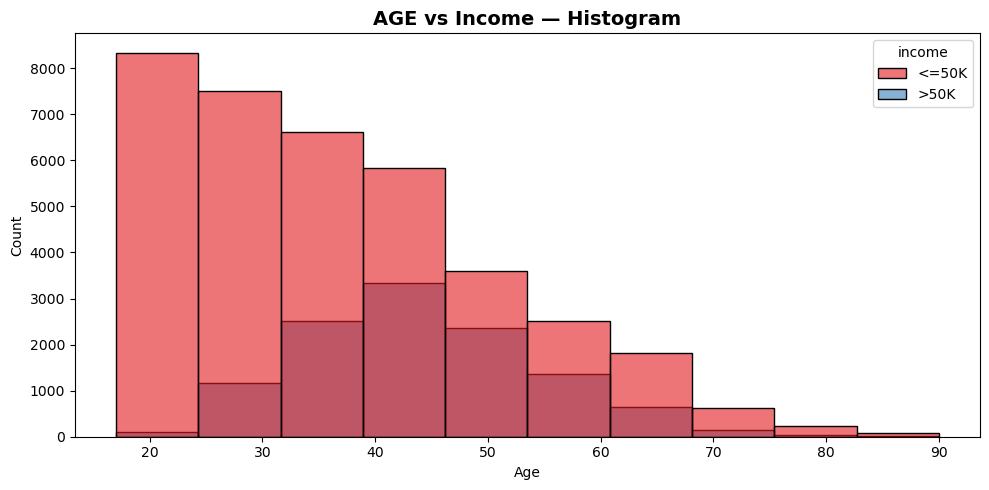

In [165]:
# Histogram — Age frequency by income
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("AGE vs Income — Histogram", fontsize=14, fontweight="bold")
sns.histplot(data=df_adult, x="age", hue="income", bins=10, palette="Set1", alpha=0.6, ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

## EDUCATION-NUM vs Income

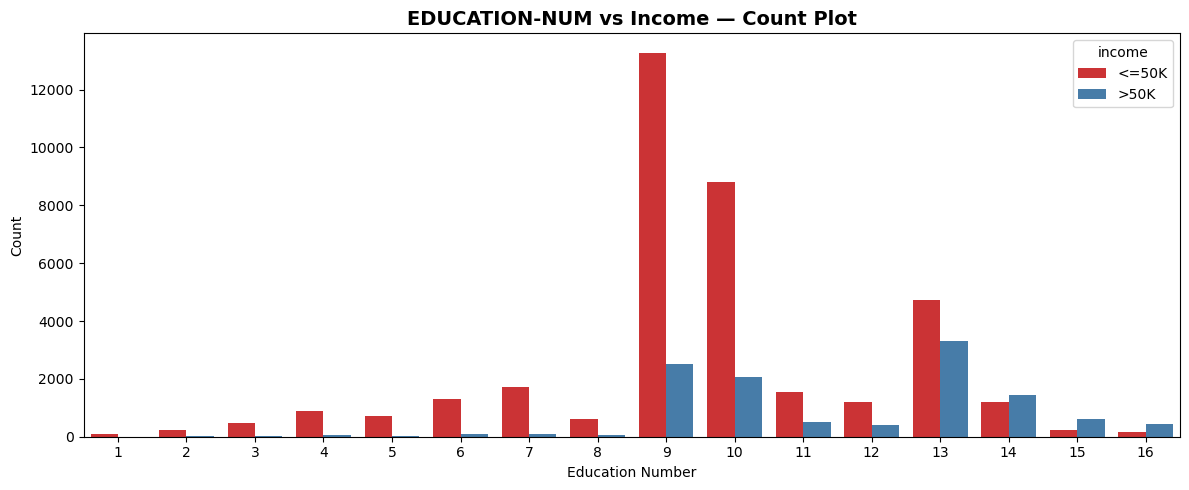

In [170]:
# Count Plot — education-num is discrete, count plot works best
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("EDUCATION-NUM vs Income — Count Plot", fontsize=14, fontweight="bold")
sns.countplot(data=df_adult, x="education-num", hue="income", palette="Set1", ax=ax)
ax.set_xlabel("Education Number")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

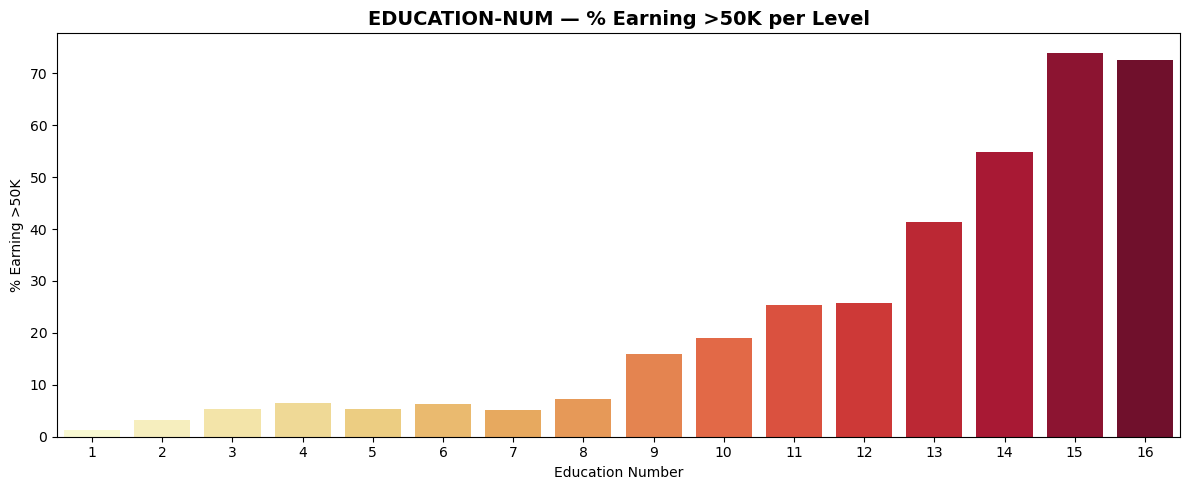

In [172]:
# >50K Rate per education level 
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("EDUCATION-NUM — % Earning >50K per Level", fontsize=14, fontweight="bold")
edu_rate = df_adult.groupby("education-num")["income"].apply(
    lambda x: (x == ">50K").mean() * 100).reset_index()
edu_rate.columns = ["education-num", "pct_above_50k"]
sns.barplot(data=edu_rate, x="education-num", y="pct_above_50k", 
            hue="education-num", palette="YlOrRd", legend=False, ax=ax)  # ← fix here
ax.set_xlabel("Education Number")
ax.set_ylabel("% Earning >50K")
plt.tight_layout()
plt.show()

# CAPITAL-GAIN vs Income

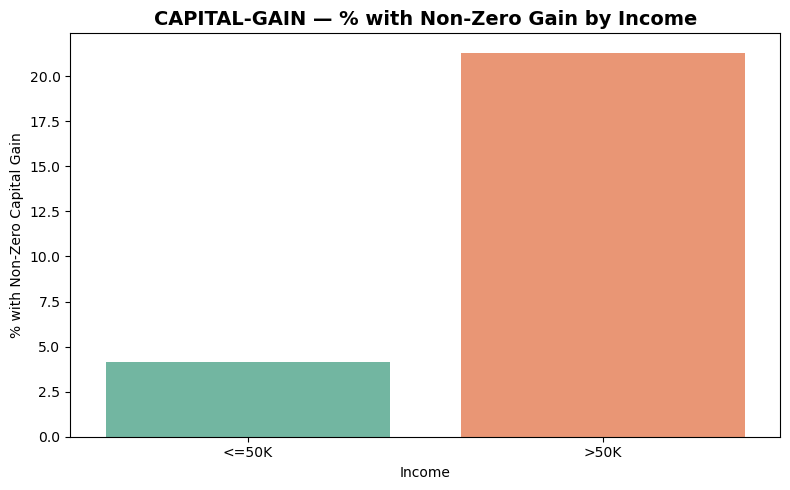

In [147]:
# Bar Plot — % with non-zero capital gain by income class

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("CAPITAL-GAIN — % with Non-Zero Gain by Income", fontsize=14, fontweight="bold")
cg_nonzero = df_adult.groupby("income")["capital-gain"].apply(
    lambda x: (x > 0).mean() * 100).reset_index()
cg_nonzero.columns = ["income", "pct_nonzero"]
sns.barplot(data=cg_nonzero, x="income", y="pct_nonzero", hue="income", palette="Set2", legend=False, ax=ax)
ax.set_xlabel("Income")
ax.set_ylabel("% with Non-Zero Capital Gain")
plt.tight_layout()
plt.show()

# CAPITAL-LOSS vs Income

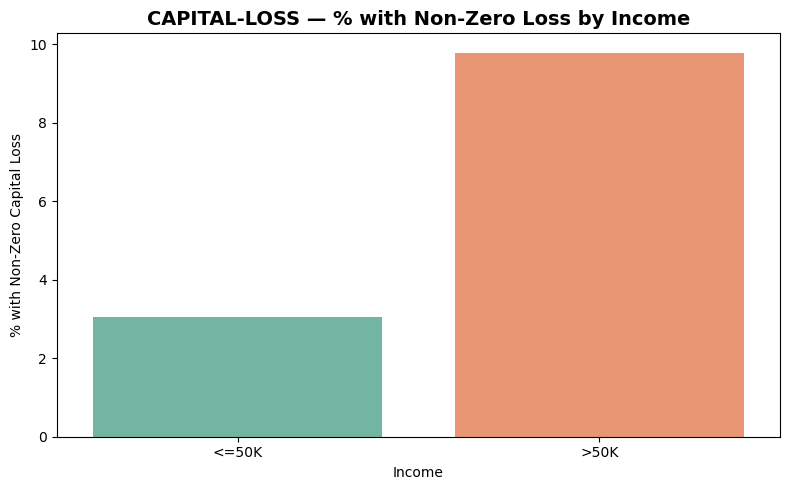

In [151]:
# Bar Plot — % with non-zero capital loss by income class
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("CAPITAL-LOSS — % with Non-Zero Loss by Income", fontsize=14, fontweight="bold")
cl_nonzero = df_adult.groupby("income")["capital-loss"].apply(
    lambda x: (x > 0).mean() * 100).reset_index()
cl_nonzero.columns = ["income", "pct_nonzero"]
sns.barplot(data=cl_nonzero, x="income", y="pct_nonzero", hue="income", palette="Set2", legend=False, ax=ax)
ax.set_xlabel("Income")
ax.set_ylabel("% with Non-Zero Capital Loss")
plt.tight_layout()
plt.show()

# HOURS-PER-WEEK vs Income

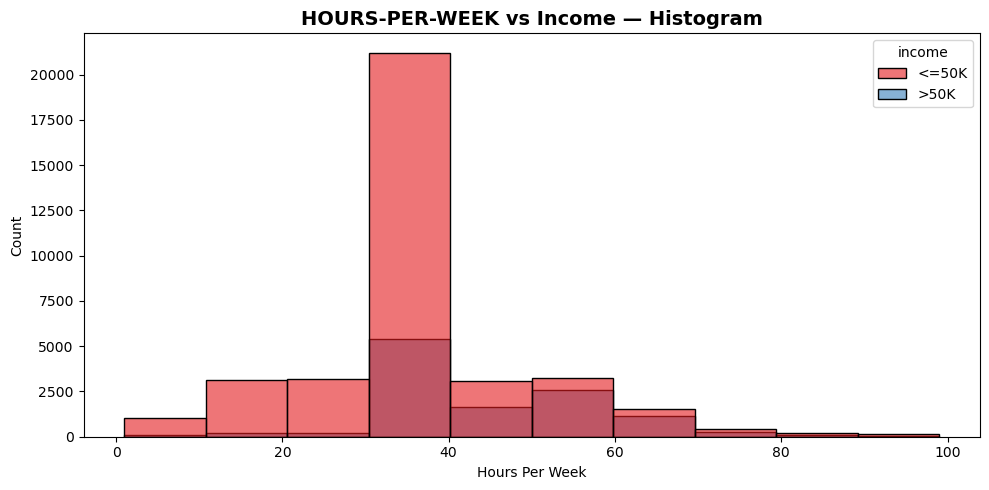

In [174]:
# Histogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("HOURS-PER-WEEK vs Income — Histogram", fontsize=14, fontweight="bold")
sns.histplot(data=df_adult, x="hours-per-week", hue="income", bins=10, palette="Set1", alpha=0.6, ax=ax)
ax.set_xlabel("Hours Per Week")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

# ═══════════════════════════════════════════════════════════════
#      BIVARIATE - CATEGORICAL FEATURES vs INCOME (TARGET)
# ═══════════════════════════════════════════════════════════════

# 1. WORKCLASS vs INCOME

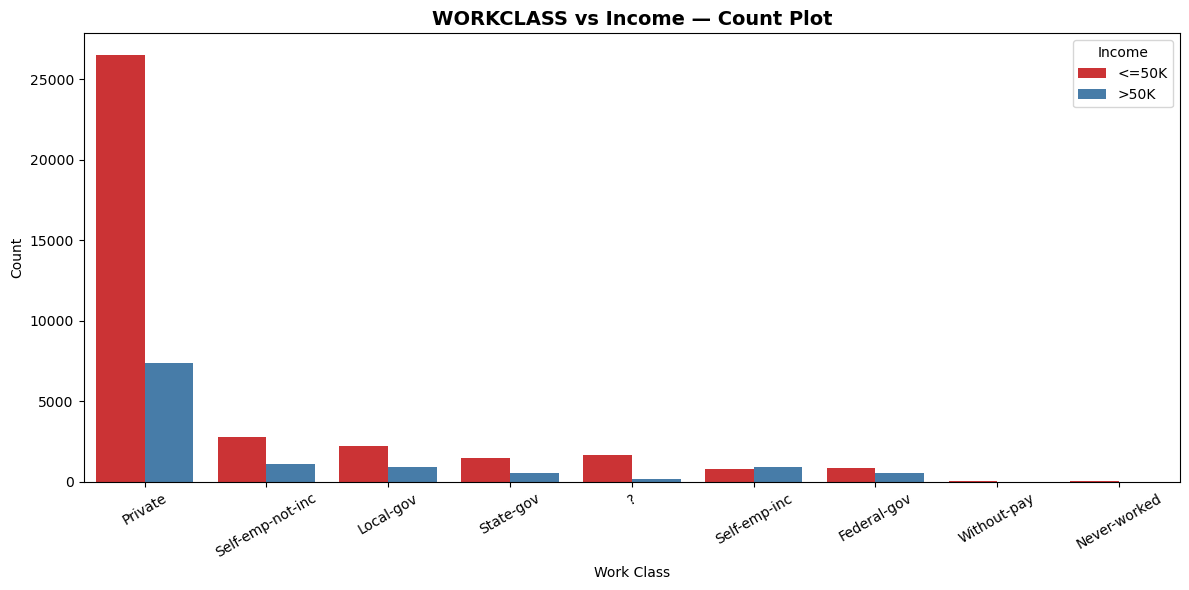

In [191]:
# Count Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("WORKCLASS vs Income — Count Plot", fontsize=14, fontweight="bold")
order = df_adult["workclass"].value_counts().index
sns.countplot(data=df_adult, x="workclass", hue="income", order=order, palette="Set1", ax=ax)
ax.set_xlabel("Work Class")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=30)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



# 2. EDUCATION vs INCOME

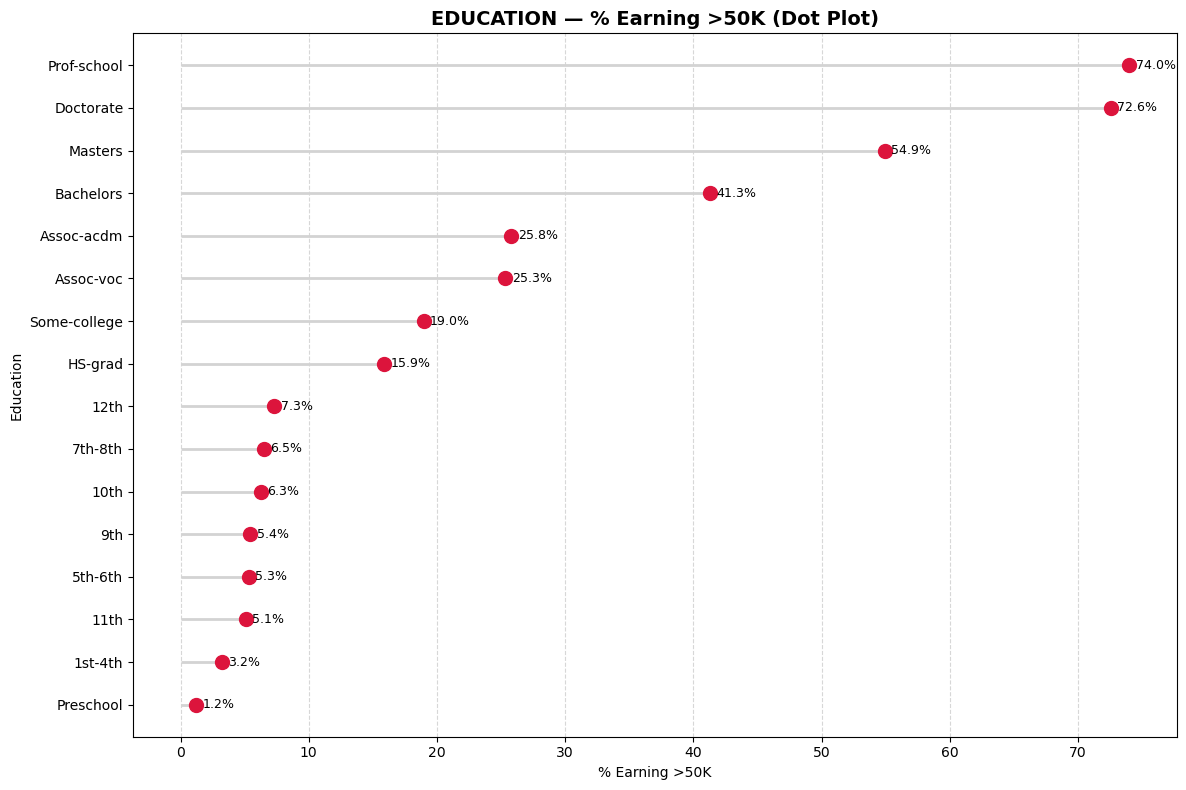

In [219]:
#Dot Plot (Cleveland)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("EDUCATION — % Earning >50K (Dot Plot)", fontsize=14, fontweight="bold")
rate = df_adult.groupby("education")["income"].apply(
    lambda x: (x == ">50K").mean() * 100).sort_values()
ax.hlines(y=rate.index, xmin=0, xmax=rate.values, color="lightgray", linewidth=2)
ax.plot(rate.values, rate.index, "o", color="crimson", markersize=10)
for i, (val, label) in enumerate(zip(rate.values, rate.index)):
    ax.text(val + 0.5, i, f"{val:.1f}%", va="center", fontsize=9)
ax.set_xlabel("% Earning >50K")
ax.set_ylabel("Education")
ax.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 3. MARITAL-STATUS vs INCOME

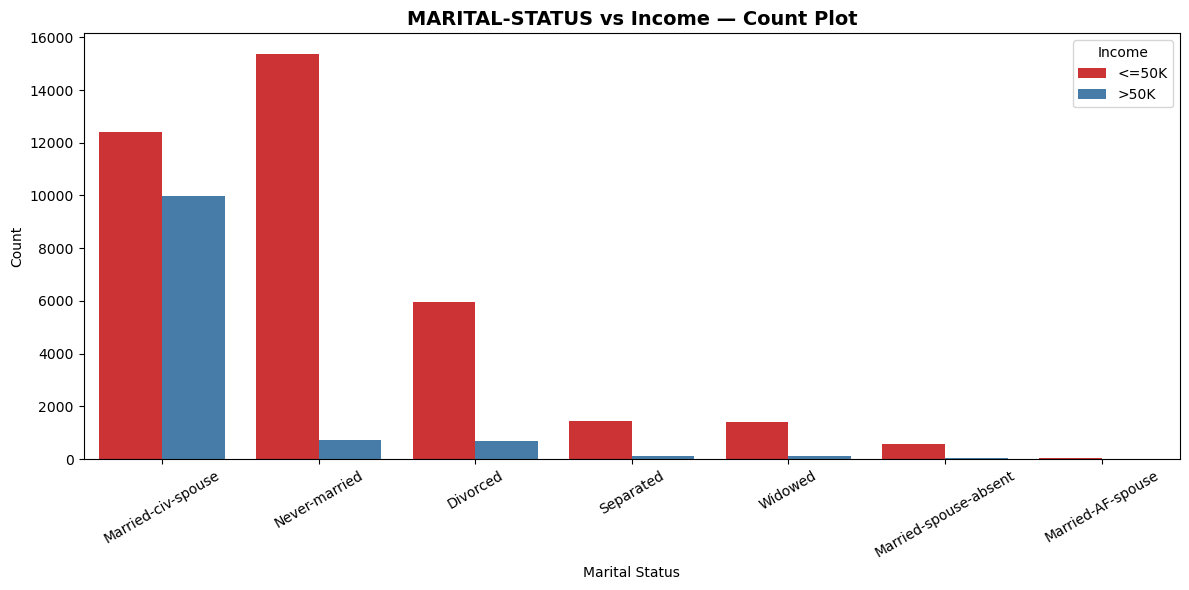

In [197]:
# Count Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("MARITAL-STATUS vs Income — Count Plot", fontsize=14, fontweight="bold")
order = df_adult["marital-status"].value_counts().index
sns.countplot(data=df_adult, x="marital-status", hue="income", order=order, palette="Set1", ax=ax)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=30)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



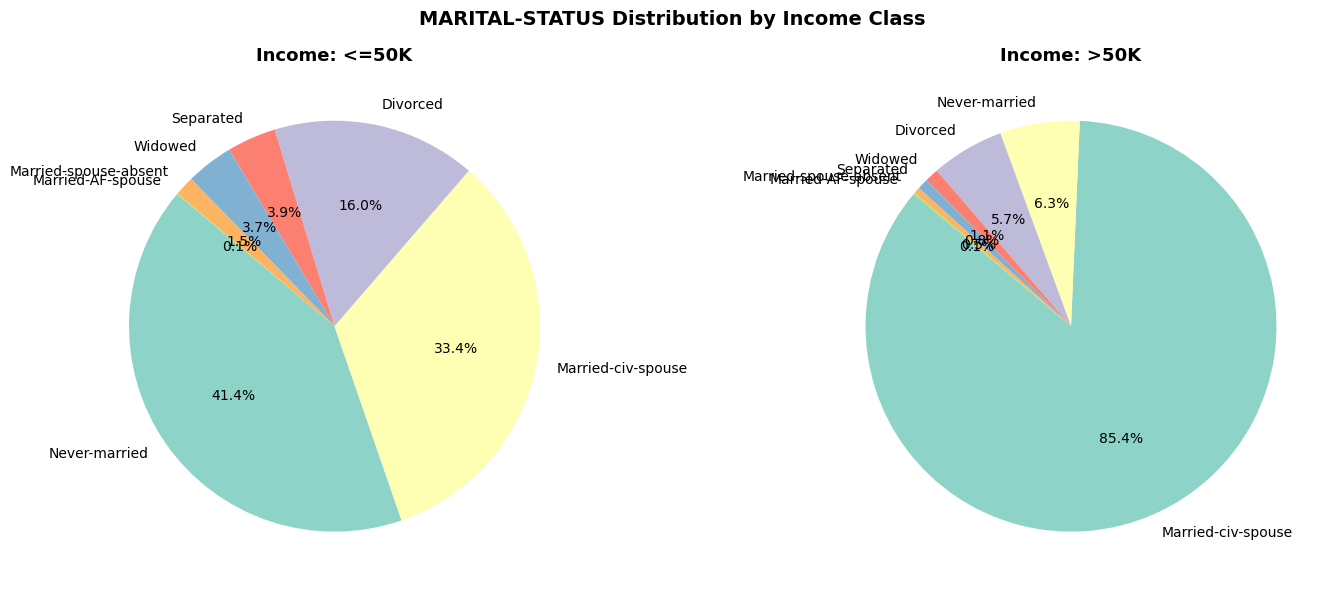

In [199]:
#Pie-chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("MARITAL-STATUS Distribution by Income Class", 
             fontsize=14, fontweight="bold")
for i, income_class in enumerate(["<=50K", ">50K"]):
    data = df_adult[df_adult["income"] == income_class]["marital-status"].value_counts()
    axes[i].pie(data, labels=data.index, autopct="%1.1f%%", startangle=140,
                colors=sns.color_palette("Set3", len(data)))
    axes[i].set_title(f"Income: {income_class}", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# 4. OCCUPATION vs INCOME

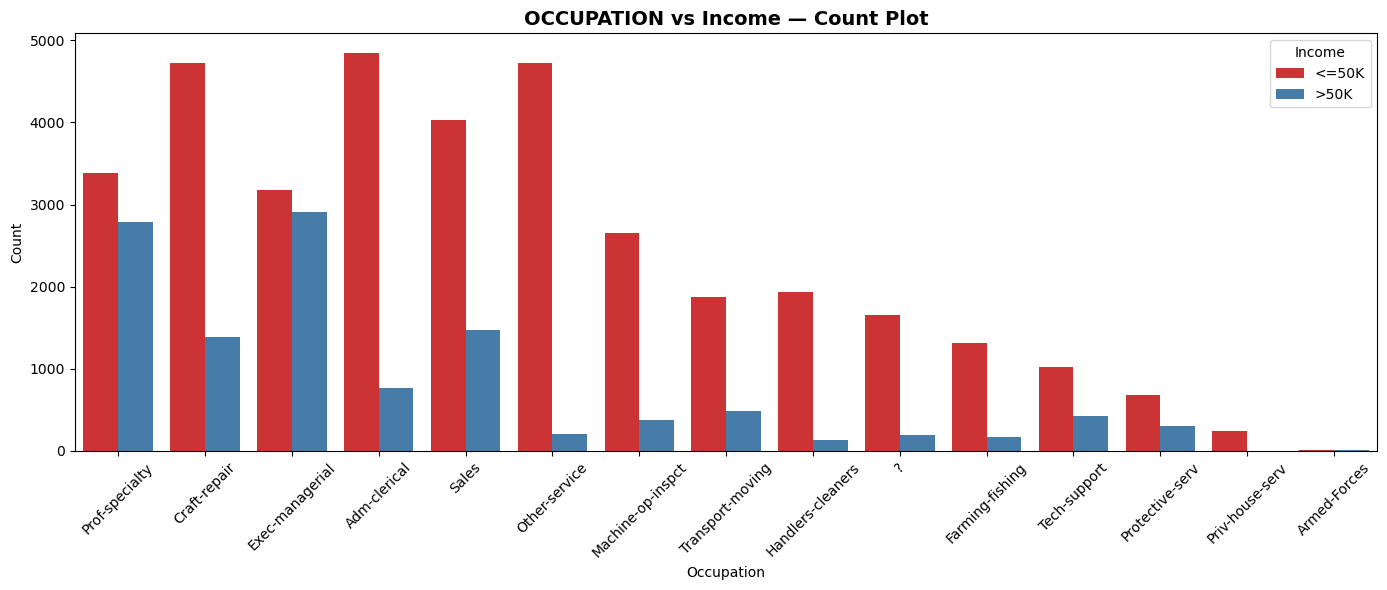

In [202]:
# Count Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("OCCUPATION vs Income — Count Plot", fontsize=14, fontweight="bold")
order = df_adult["occupation"].value_counts().index
sns.countplot(data=df_adult, x="occupation", hue="income", order=order, palette="Set1", ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=45)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



# 5.RELATIONSHIP vs INCOME

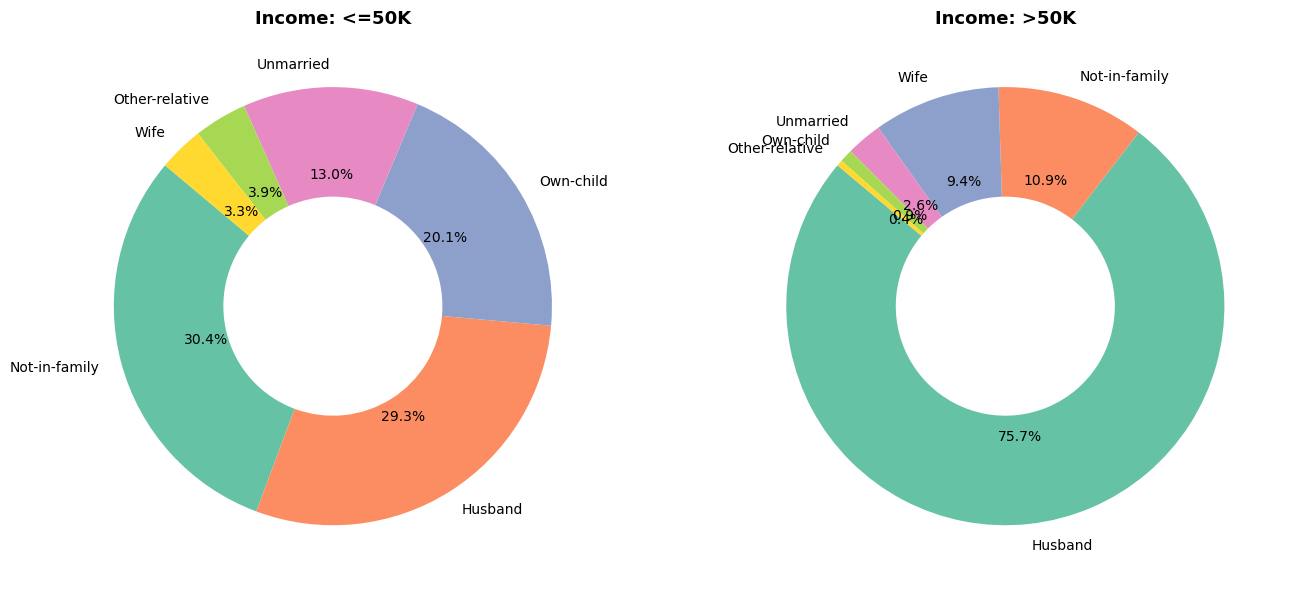

In [204]:
# Donut Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, income_class in enumerate(["<=50K", ">50K"]):
    data = df_adult[df_adult["income"] == income_class]["relationship"].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        data, labels=data.index, autopct="%1.1f%%", startangle=140,
        colors=sns.color_palette("Set2", len(data)),
        wedgeprops=dict(width=0.5))
    axes[i].set_title(f"Income: {income_class}", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()



# 6. RACE vs INCOME

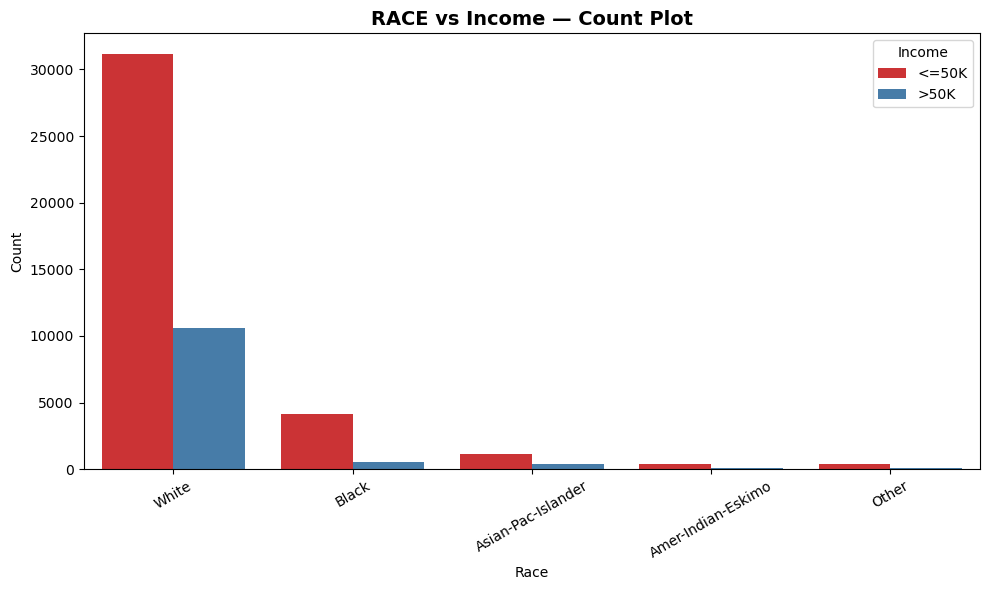

In [211]:
# Count Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("RACE vs Income — Count Plot", fontsize=14, fontweight="bold")
order = df_adult["race"].value_counts().index
sns.countplot(data=df_adult, x="race", hue="income", order=order, palette="Set1", ax=ax)
ax.set_xlabel("Race")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=30)
ax.legend(title="Income")
plt.tight_layout()
plt.show()


# 7. SEX vs INCOME

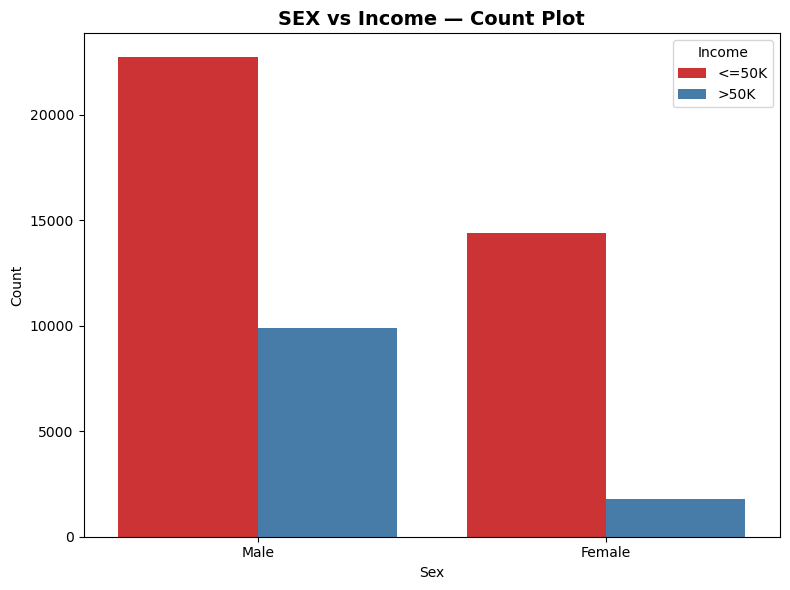

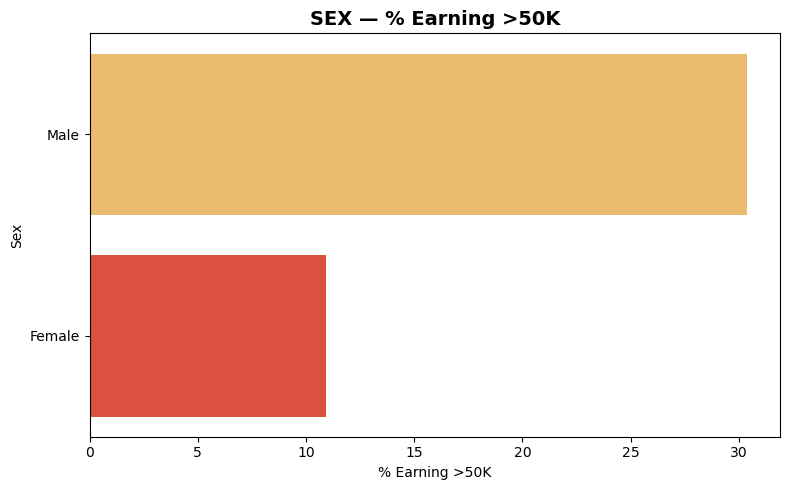

In [244]:
# Count Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("SEX vs Income — Count Plot", fontsize=14, fontweight="bold")
sns.countplot(data=df_adult, x="sex", hue="income", palette="Set1", ax=ax)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(title="Income")
plt.tight_layout()
plt.show()


# >50K Income Rate Bar
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("SEX — % Earning >50K", fontsize=14, fontweight="bold")
rate = df_adult.groupby("sex")["income"].apply(
    lambda x: (x == ">50K").mean() * 100).sort_values(ascending=False).reset_index()
rate.columns = ["sex", "pct"]
sns.barplot(data=rate, x="pct", y="sex", hue="sex", 
            palette="YlOrRd", legend=False, ax=ax)
ax.set_xlabel("% Earning >50K")
ax.set_ylabel("Sex")
plt.tight_layout()
plt.show()


# 8. NATIVE-COUNTRY vs INCOME

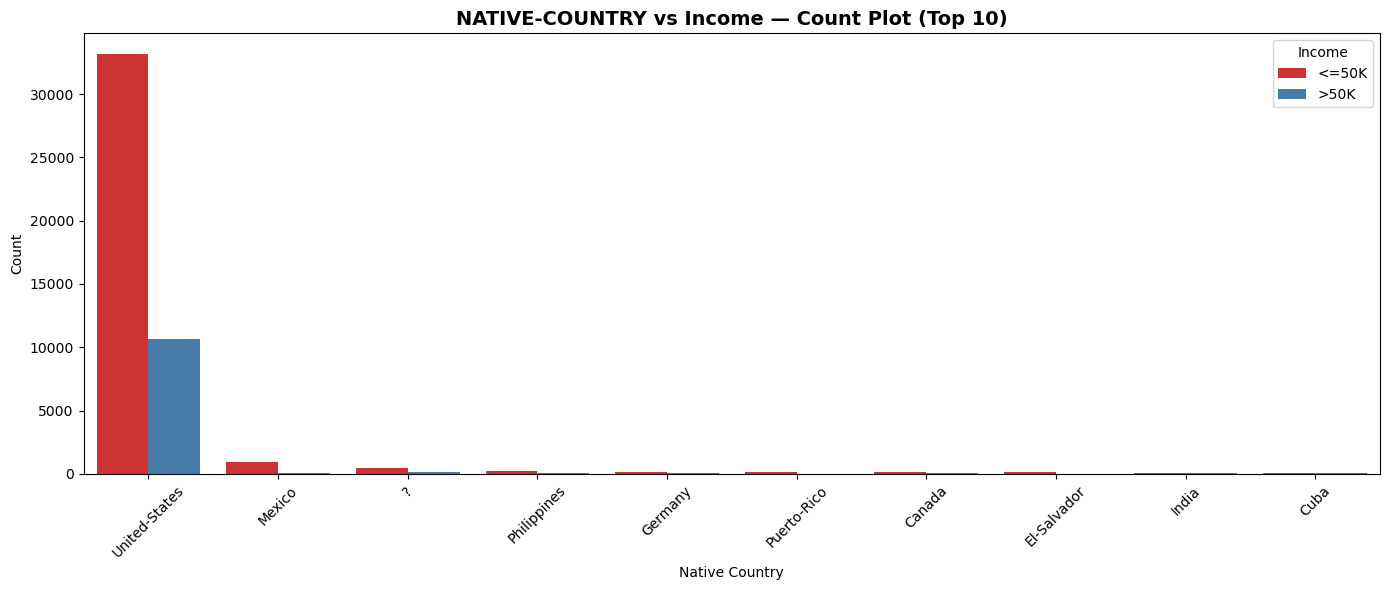

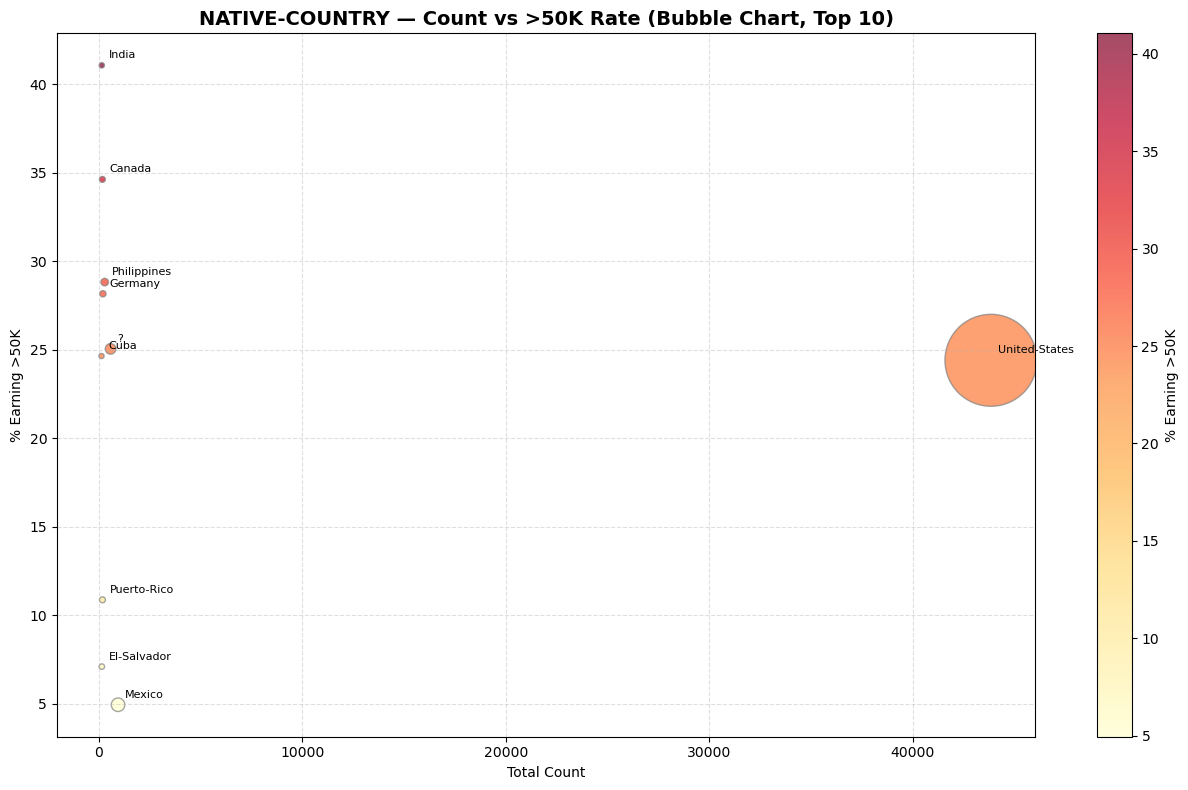

In [223]:
# Count Plot — Top 10 countries only (too many otherwise)
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("NATIVE-COUNTRY vs Income — Count Plot (Top 10)", fontsize=14, fontweight="bold")
top10 = df_adult["native-country"].value_counts().head(10).index
sns.countplot(data=df_adult[df_adult["native-country"].isin(top10)], 
              x="native-country", hue="income", order=top10, palette="Set1", ax=ax)
ax.set_xlabel("Native Country")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=45)
ax.legend(title="Income")
plt.tight_layout()
plt.show()

# NATIVE-COUNTRY vs INCOME — Bubble Chart (Top 10) ─────────
fig, ax = plt.subplots(figsize=(13, 8))
ax.set_title("NATIVE-COUNTRY — Count vs >50K Rate (Bubble Chart, Top 10)", 
             fontsize=14, fontweight="bold")
top10 = df_adult["native-country"].value_counts().head(10).index
country_stats = df_adult[df_adult["native-country"].isin(top10)].groupby("native-country").agg(
    total=("income", "count"),
    pct_above=("income", lambda x: (x == ">50K").mean() * 100)
).reset_index()
scatter = ax.scatter(country_stats["total"], country_stats["pct_above"],
                     s=country_stats["total"] / 10, 
                     c=country_stats["pct_above"],
                     cmap="YlOrRd", alpha=0.7, edgecolors="gray")
for _, row in country_stats.iterrows():
    ax.annotate(row["native-country"], 
                (row["total"], row["pct_above"]),
                textcoords="offset points", xytext=(5, 5), fontsize=8)
plt.colorbar(scatter, label="% Earning >50K")
ax.set_xlabel("Total Count")
ax.set_ylabel("% Earning >50K")
ax.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Correlation (Numerical vs Numerical)

Age vs Education Number

In [89]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_adult["age"], df_adult["education-num"])

print("Correlation:", corr)
print("p-value:", p_value)

Correlation: 0.03094037587451403
p-value: 7.955032710144095e-12


The Pearson correlation coefficient between age and education level is 0.03, which indicates a very weak positive relationship. Since the correlation value is close to zero, there is almost no linear relationship between age and education level.

In [77]:
corr, p_value = pearsonr(df_adult["income_binary"], df_adult["education-num"])

print("Correlation:", corr)
print("p-value:", p_value)

Correlation: 0.3326131306661461
p-value: 0.0


The Pearson correlation coefficient between the variables is 0.333, which indicates a moderate positive relationship between them. This means that as one variable increases, the other variable tends to increase as well.

# ═══════════════════════════════════════════════════════════════
# MULTIVARIATE ANALYSIS
# ═══════════════════════════════════════════════════════════════

Multivariate analysis examines the relationships between three or more variables at the same time. Unlike univariate analysis (one variable) or bivariate analysis (two variables), multivariate analysis helps understand how multiple features interact together and influence outcomes.

It is useful for identifying patterns, trends, and combined effects of several variables in the dataset.

Common Techniques Used:

## 1. Heatmap (Correlation Heatmap)
   
A heatmap visually represents the correlation between multiple numerical variables using colors.

Values range from -1 to +1

+1 → Strong positive relationship

-1 → Strong negative relationship

0 → No relationship

From the Adult dataset heatmap:
- Education-num and income_binary show a moderate positive correlation.
- Age, hours-per-week, and capital-gain also show positive relationships with income.
- Capital-loss has a weaker relationship with income.

This helps identify which variables are most related to income.

## 2. Pair Plot
A pair plot shows scatter plots between all numerical variables and helps visualize relationships and trends between multiple variables simultaneously.

It helps to:
- Detect patterns
- Identify correlations
- Detect clusters and outliers

## 3. Multiple Linear Regression

## 4. Logistic Regression

## 5. Principal Component Analysis (PCA)

## 6. Multivariate Scatter Plot

## 7. Cluster Analysis
Groups similar observations based on multiple variables.
Purpose:
- Identify natural groupings in data






# ═══════════════════════════════════════════════════════════════
#        MULTIVARIATE - CORRELATION ANALYSIS 
# ═══════════════════════════════════════════════════════════════

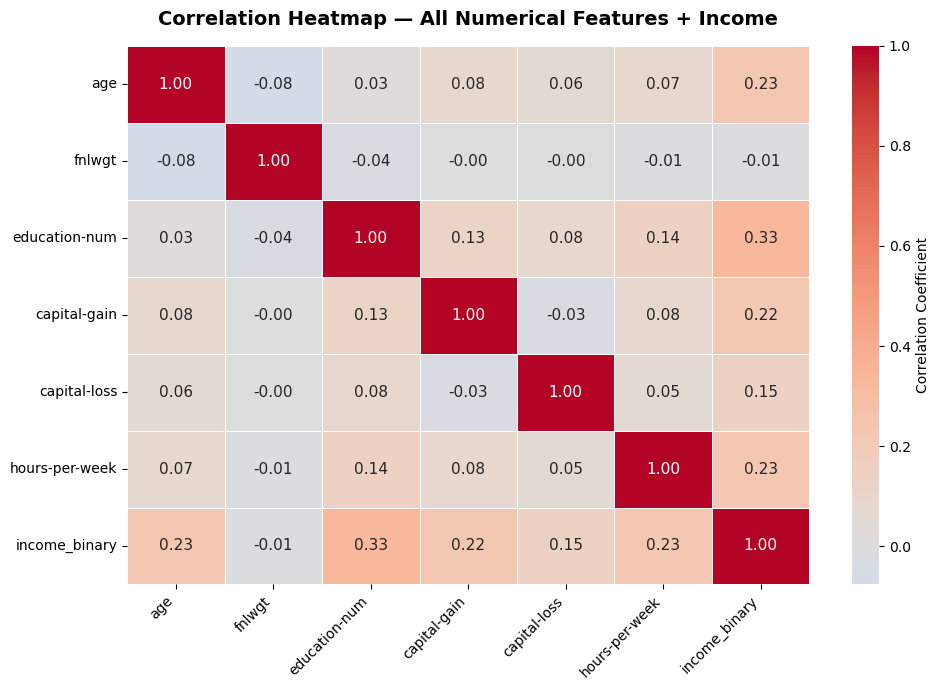

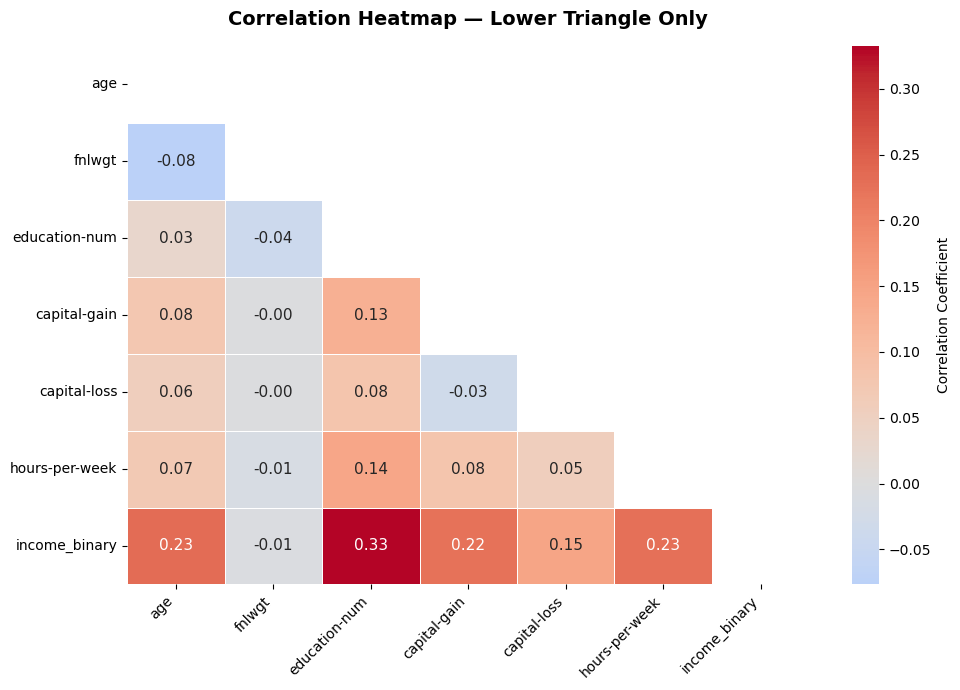

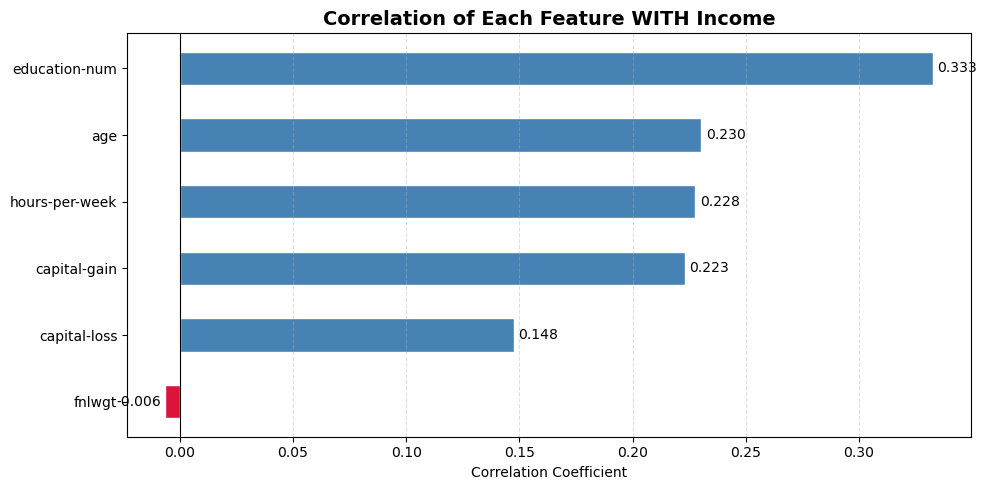

In [316]:

# ── Step 1: Create income_binary ─────────────────────────────────
df_adult["income_binary"] = (df_adult["income"] == ">50K").astype(int)

# ── Step 2: Select features + compute correlation ────────────────
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", 
            "capital-loss", "hours-per-week", "income_binary"]
df_corr  = df_adult[num_cols].copy()
corr     = df_corr.corr()

# ── Step 3: Full Heatmap ─────────────────────────────────────────
plt.figure(figsize=(10, 7))
sns.heatmap(corr,
            annot      = True,
            fmt        = ".2f",
            cmap       = "coolwarm",
            center     = 0,
            linewidths = 0.5,
            linecolor  = "white",
            annot_kws  = {"size": 11},
            cbar_kws   = {"label": "Correlation Coefficient"})
plt.title("Correlation Heatmap — All Numerical Features + Income",
          fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ── Step 4: Masked Heatmap — Lower Triangle Only ─────────────────
fig, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            mask       = mask,
            annot      = True,
            fmt        = ".2f",
            cmap       = "coolwarm",
            center     = 0,
            linewidths = 0.5,
            linecolor  = "white",
            ax         = ax,
            annot_kws  = {"size": 11},
            cbar_kws   = {"label": "Correlation Coefficient"})
ax.set_title("Correlation Heatmap — Lower Triangle Only",
             fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ── Step 5: Income Correlation Bar Chart ─────────────────────────
income_corr = corr["income_binary"].drop("income_binary").sort_values()

fig, ax = plt.subplots(figsize=(10, 5))
colors = ["crimson" if v < 0 else "steelblue" for v in income_corr]
bars   = ax.barh(income_corr.index, income_corr.values,
                 color=colors, edgecolor="white", height=0.5)

for bar, val in zip(bars, income_corr.values):
    ax.text(val + 0.002 if val >= 0 else val - 0.002,
            bar.get_y() + bar.get_height() / 2,
            f"{val:.3f}", va="center",
            ha="left" if val >= 0 else "right", fontsize=10)

ax.axvline(0, color="black", linewidth=0.8)
ax.set_title("Correlation of Each Feature WITH Income",
             fontsize=14, fontweight="bold")
ax.set_xlabel("Correlation Coefficient")
ax.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# ═══════════════════════════════════════════════════════════════
#        MULTIVARIATE - PAIR PLOT ANALYSIS 
# ═══════════════════════════════════════════════════════════════

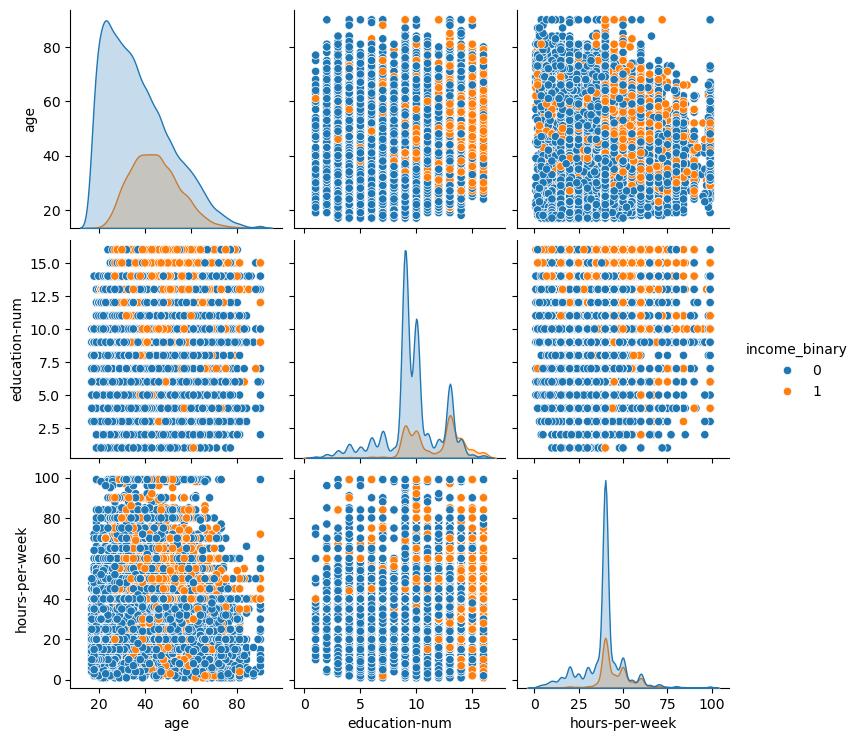

In [323]:
vars_selected = ['age', 'education-num', 'hours-per-week', 'income_binary']
sns.pairplot(df_adult[vars_selected], hue='income_binary')
plt.show()

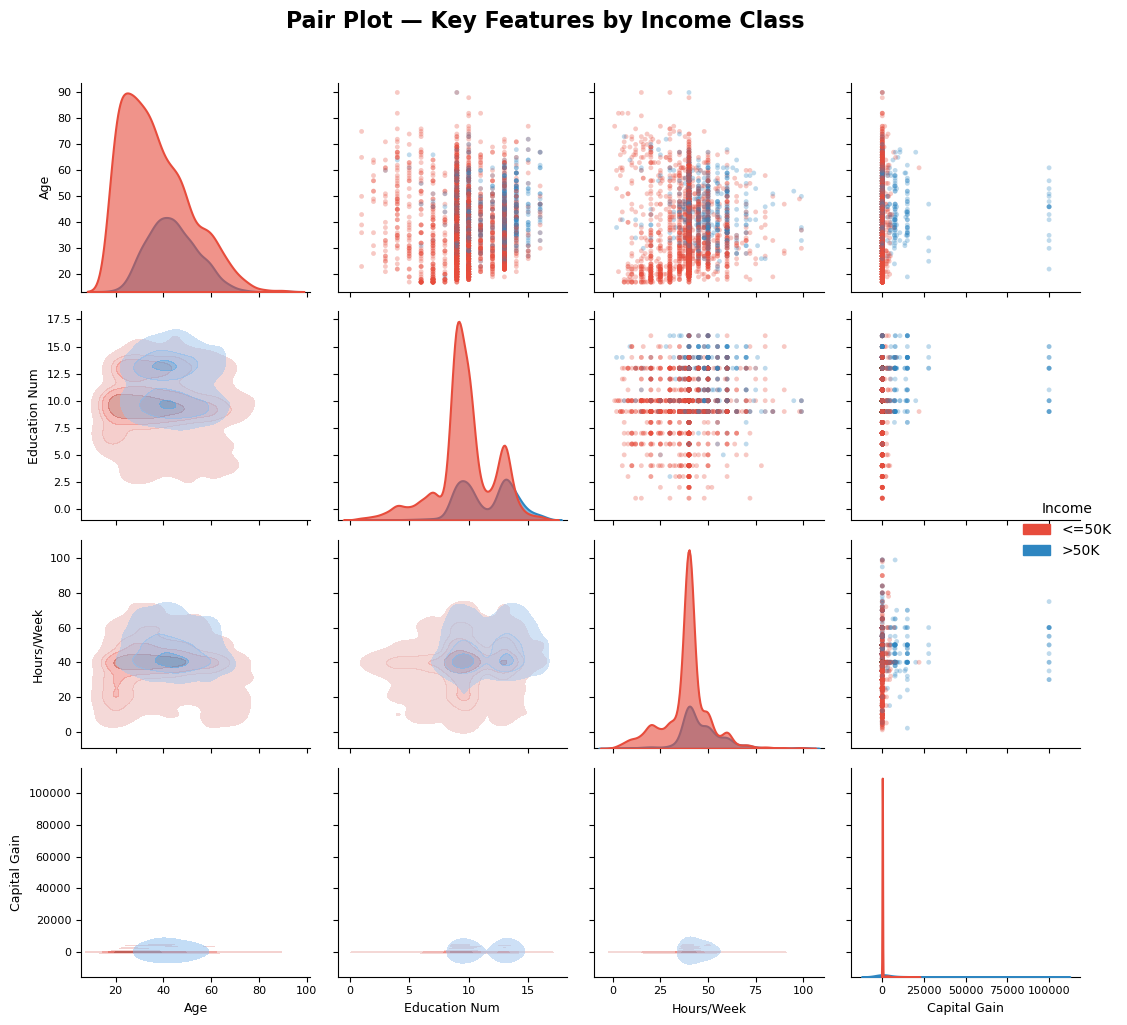

In [282]:

# ── Step 1: Select best features (drop weak ones) ───────────────
# Dropping fnlwgt (not significant) and capital-loss (too sparse)
best_features = ["age", "education-num", "hours-per-week", 
                 "capital-gain", "income"]

df_pair = df_adult[best_features].copy()

# ── Step 2: Sample for performance (pairplot is slow on 48k rows)
df_sample = df_pair.sample(3000, random_state=42)

# ── Step 3: Best Pairplot ────────────────────────────────────────
g = sns.PairGrid(df_sample, 
                 hue    = "income",
                 palette= {"<=50K": "#E74C3C", ">50K": "#2E86C1"},
                 height = 2.5,
                 diag_sharey = False)

# Upper triangle → scatter
g.map_upper(sns.scatterplot, alpha=0.3, s=12, edgecolor="none")

# Lower triangle → KDE density contours
g.map_lower(sns.kdeplot, alpha=0.5, fill=True, thresh=0.05, levels=5)

# Diagonal → KDE filled
g.map_diag(sns.kdeplot, fill=True, alpha=0.6, linewidth=1.5)

# Legend + title
g.add_legend(title="Income", 
             bbox_to_anchor=(1.02, 0.5),
             borderaxespad=0)
g.figure.suptitle("Pair Plot — Key Features by Income Class", 
                   fontsize=16, fontweight="bold", y=1.02)

# ── Step 4: Axis labels ──────────────────────────────────────────
labels = {"age"           : "Age",
          "education-num" : "Education Num",
          "hours-per-week": "Hours/Week",
          "capital-gain"  : "Capital Gain"}

for ax in g.axes.flatten():
    if ax.get_xlabel() in labels:
        ax.set_xlabel(labels[ax.get_xlabel()], fontsize=9)
    if ax.get_ylabel() in labels:
        ax.set_ylabel(labels[ax.get_ylabel()], fontsize=9)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

# ═══════════════════════════════════════════════════════════════
#        MULTIVARIATE - ANOVA ANALYSIS 
# ═══════════════════════════════════════════════════════════════

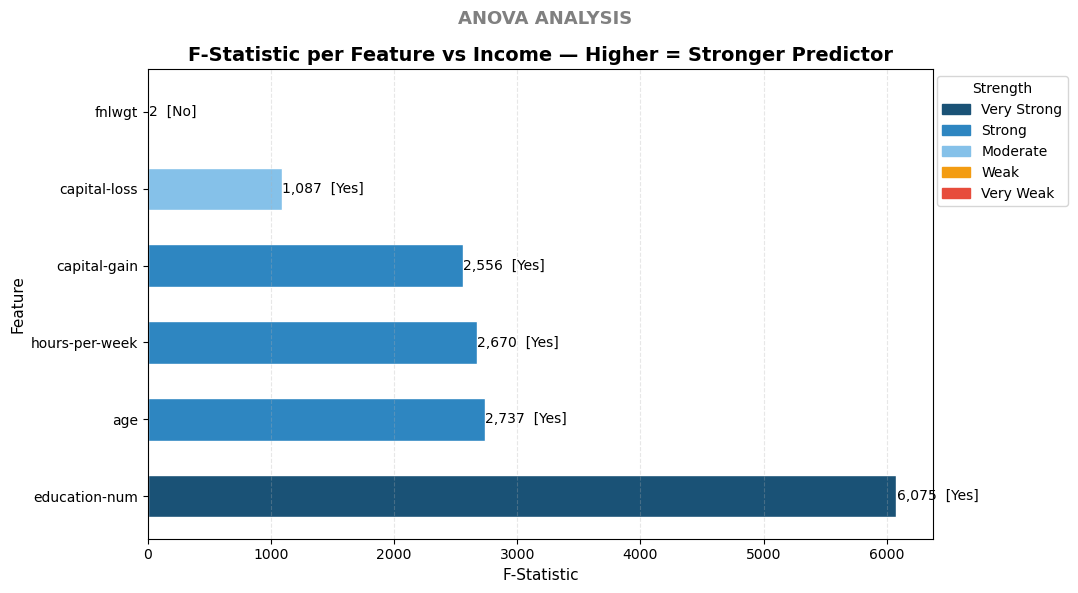

Feature,F-Statistic,p-value,Significant,Strength
education-num,"6,075.37",0.0000e+00,Yes,Very Strong
age,"2,737.21",0.0000e+00,Yes,Strong
hours-per-week,"2,670.36",0.0000e+00,Yes,Strong
capital-gain,"2,556.18",0.0000e+00,Yes,Strong
capital-loss,"1,087.03",8.5436e-236,Yes,Moderate
fnlwgt,1.96,1.6125e-01,No,Very Weak


In [306]:
# ── Step 1: Run ANOVA for all numerical features ─────────────────
numerical = ["age", "fnlwgt", "education-num","capital-gain", "capital-loss", "hours-per-week"]

group1 = df_adult[df_adult["income"] == "<=50K"]  # Group 1
group2 = df_adult[df_adult["income"] == ">50K"]   # Group 2

anova_results = []
for col in numerical:
    f_stat, p_val = f_oneway(group1[col], group2[col])
    anova_results.append({
        "Feature"    : col,
        "F-Statistic": round(f_stat, 2),
        "p-value"    : p_val,
        "Significant": "Yes" if p_val < 0.05 else "No",
        "Strength"   : "Very Strong" if f_stat > 1000 else
                       "Strong"      if f_stat > 500  else
                       "Moderate"    if f_stat > 100  else
                       "Weak"        if f_stat > 10   else "Very Weak"
    })

anova_df = pd.DataFrame(anova_results).sort_values("F-Statistic", ascending=False)

# ── F-Statistic Bar Chart — Fixed Thresholds ─────────────────────
color_map = {
    "Very Strong": "#1A5276",
    "Strong"     : "#2E86C1",
    "Moderate"   : "#85C1E9",
    "Weak"       : "#F39C12",
    "Very Weak"  : "#E74C3C",
}

# Fix: Recalculate Strength based on actual data range
def get_strength(f):
    if f > 5000:   return "Very Strong"
    elif f > 2500: return "Strong"
    elif f > 1000: return "Moderate"
    elif f > 100:  return "Weak"
    else:          return "Very Weak"

anova_df["Strength"] = anova_df["F-Statistic"].apply(get_strength)

fig, ax = plt.subplots(figsize=(11, 6))
fig.suptitle("ANOVA ANALYSIS", fontsize=13, fontweight="bold", color="gray")
ax.set_title("F-Statistic per Feature vs Income — Higher = Stronger Predictor",
             fontsize=14, fontweight="bold")

colors = [color_map[s] for s in anova_df["Strength"]]
bars   = ax.barh(anova_df["Feature"], anova_df["F-Statistic"],
                 color=colors, edgecolor="white", height=0.55)

# ── Fix: Replace emoji with plain text ──────────────────────────
for bar, val, sig in zip(bars, anova_df["F-Statistic"], anova_df["Significant"]):
    label = f"{val:,.0f}  [Yes]" if sig == "Yes" else f"{val:,.0f}  [No]"
    ax.text(bar.get_width() + 5,
            bar.get_y() + bar.get_height() / 2,
            label, va="center", fontsize=10)

ax.set_xlabel("F-Statistic", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)
ax.grid(axis="x", linestyle="--", alpha=0.3)
ax.legend(handles=[mpatches.Patch(color=c, label=l) for l, c in color_map.items()],
          title="Strength", bbox_to_anchor=(1.18, 1))
plt.tight_layout()
plt.show()


# ── Step 2: Styled Summary Table ─────────────────────────────────
def highlight_anova(row):
    if row["Significant"] == "No":
        return ["background-color: #fadbd8"] * len(row)
    elif row["F-Statistic"] > 1000:
        return ["background-color: #1A5276; color: white"] * len(row)
    elif row["F-Statistic"] > 500:
        return ["background-color: #d4e6f1"] * len(row)
    elif row["F-Statistic"] > 100:
        return ["background-color: #d5f5e3"] * len(row)
    else:
        return ["background-color: #fef9e7"] * len(row)

anova_df.style\
    .apply(highlight_anova, axis=1)\
    .format({"F-Statistic": "{:,.2f}", "p-value": "{:.4e}"})\
    .set_caption("ANOVA Test — Numerical Features vs Income")\
    .hide(axis="index")

# ═══════════════════════════════════════════════════════════════
#   CHI-SQUARE TEST — ALL FEATURES (Categorical + Numerical)
# ═══════════════════════════════════════════════════════════════

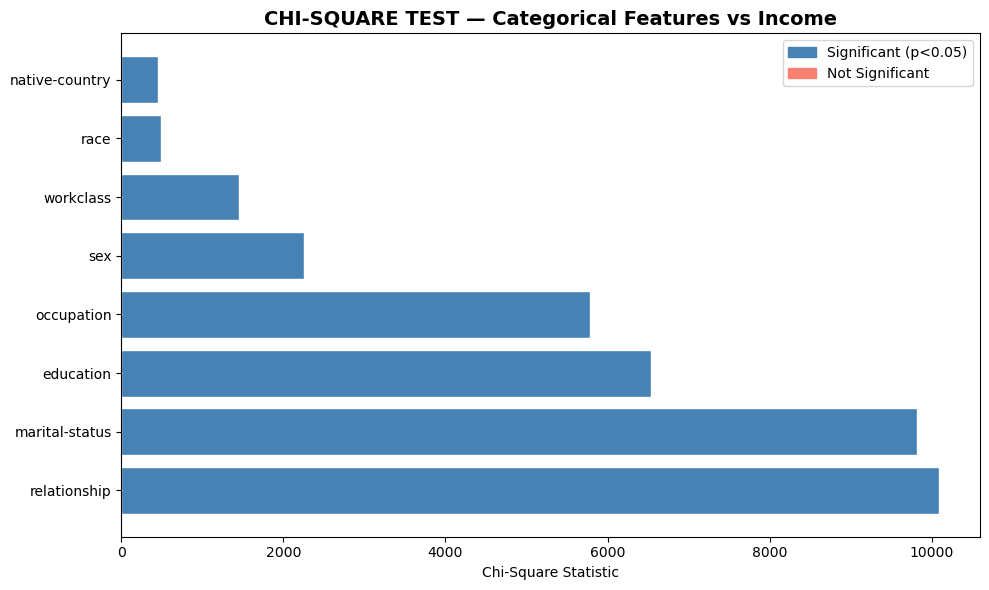

In [331]:

categorical = ["workclass", "education", "marital-status", "occupation", 
               "relationship", "race", "sex", "native-country"]

chi2_results = []
for col in categorical:
    ct = pd.crosstab(df_adult[col], df_adult["income"])
    chi2, p, dof, _ = chi2_contingency(ct)
    chi2_results.append({"Feature": col, "Chi2": chi2, "p-value": p})

chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("CHI-SQUARE TEST — Categorical Features vs Income", 
             fontsize=14, fontweight="bold")
colors = ["steelblue" if p < 0.05 else "salmon" for p in chi2_df["p-value"]]
ax.barh(chi2_df["Feature"], chi2_df["Chi2"], color=colors, edgecolor="white")
ax.set_xlabel("Chi-Square Statistic")
from matplotlib.patches import Patch
ax.legend(handles=[Patch(color="steelblue", label="Significant (p<0.05)"),
                   Patch(color="salmon", label="Not Significant")])
plt.tight_layout()
plt.show()



In [334]:
from scipy.stats import chi2_contingency
import pandas as pd

# ── Step 1: Bin numerical features ──────────────────────────────
df_chi = df_adult.copy()
df_chi["age_bin"]            = pd.cut(df_chi["age"],            bins=5)
df_chi["fnlwgt_bin"]         = pd.cut(df_chi["fnlwgt"],         bins=5)
df_chi["education_num_bin"]  = pd.cut(df_chi["education-num"],  bins=5)
df_chi["capital_gain_bin"]   = pd.cut(df_chi["capital-gain"],   bins=5)
df_chi["capital_loss_bin"]   = pd.cut(df_chi["capital-loss"],   bins=5)
df_chi["hours_week_bin"]     = pd.cut(df_chi["hours-per-week"], bins=5)

# ── Step 2: Define all features ──────────────────────────────────
all_features = {
    "workclass"              : "workclass",
    "education"              : "education",
    "marital-status"         : "marital-status",
    "occupation"             : "occupation",
    "relationship"           : "relationship",
    "race"                   : "race",
    "sex"                    : "sex",
    "native-country"         : "native-country",
    "age (binned)"           : "age_bin",
    "fnlwgt (binned)"        : "fnlwgt_bin",
    "education-num (binned)" : "education_num_bin",
    "capital-gain (binned)"  : "capital_gain_bin",
    "capital-loss (binned)"  : "capital_loss_bin",
    "hours-per-week (binned)": "hours_week_bin",
}

# ── Step 3: Run Chi-Square ────────────────────────────────────────
chi2_results = []
for label, col in all_features.items():
    ct = pd.crosstab(df_chi[col], df_chi["income"])
    chi2, p, dof, _ = chi2_contingency(ct)
    chi2_results.append({
        "Feature"    : label,
        "Chi2"       : round(chi2, 2),
        "p-value"    : p,
        "DOF"        : dof,
        "Type"       : "Numerical" if "(binned)" in label else "Categorical",
        "Significant": "Yes" if p < 0.05 else "No"
    })

chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2", ascending=False)

# ── Step 4: Styled Table ─────────────────────────────────────────
chi2_df_display = chi2_df[["Feature", "Chi2", "p-value", "Type", "Significant"]].copy()

def highlight_rows(row):
    if row["Significant"] == "Yes" and row["Type"] == "Categorical":
        return ["background-color: #d4e6f1"] * len(row)
    elif row["Significant"] == "Yes" and row["Type"] == "Numerical":
        return ["background-color: #d5f5e3"] * len(row)
    else:
        return ["background-color: #fadbd8"] * len(row)

chi2_df_display.style\
    .apply(highlight_rows, axis=1)\
    .format({"Chi2": "{:,.2f}", "p-value": "{:.2e}"})\
    .set_caption("Chi-Square Test — All Features vs Income")\
    .hide(axis="index")



Feature,Chi2,p-value,Type,Significant
relationship,"10,088.72",0.00e+00,Categorical,Yes
marital-status,"9,816.02",0.00e+00,Categorical,Yes
education,"6,537.97",0.00e+00,Categorical,Yes
education-num (binned),"5,949.74",0.00e+00,Numerical,Yes
occupation,"5,788.35",0.00e+00,Categorical,Yes
age (binned),"4,273.64",0.00e+00,Numerical,Yes
hours-per-week (binned),"3,206.44",0.00e+00,Numerical,Yes
sex,"2,248.85",0.00e+00,Categorical,Yes
capital-loss (binned),"1,864.53",0.00e+00,Numerical,Yes
workclass,"1,457.36",2.24e-309,Categorical,Yes


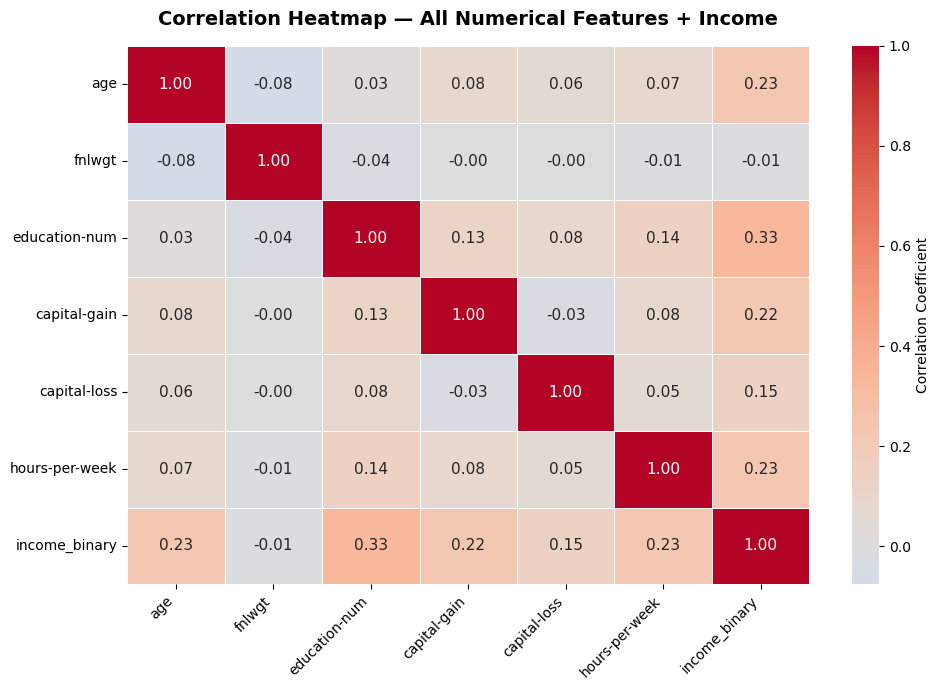

In [350]:
# ── Step 1: Create income_binary ─────────────────────────────────
df_adult["income_binary"] = (df_adult["income"] == ">50K").astype(int)

# ── Step 2: Select features + compute correlation ────────────────
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", 
            "capital-loss", "hours-per-week", "income_binary"]
df_corr  = df_adult[num_cols].copy()
corr     = df_corr.corr()

# ── Step 3: Full Heatmap ─────────────────────────────────────────
plt.figure(figsize=(10, 7))
sns.heatmap(corr,
            annot      = True,
            fmt        = ".2f",
            cmap       = "coolwarm",
            center     = 0,
            linewidths = 0.5,
            linecolor  = "white",
            annot_kws  = {"size": 11},
            cbar_kws   = {"label": "Correlation Coefficient"})
plt.title("Correlation Heatmap — All Numerical Features + Income",
          fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()